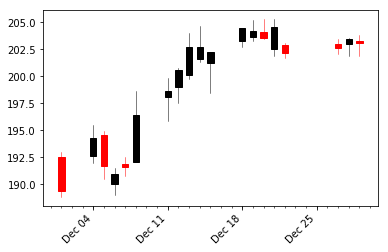

In [6]:
import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator

from mpl_finance import candlestick_ohlc

date1 = "2017-12-1"
date2 = "2017-12-31"


mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

quotes = pd.read_csv('market_data/BARC.L.csv',
                     index_col=0,
                     parse_dates=True,
                     infer_datetime_format=True)

# select desired range of dates
quotes = quotes[(quotes.index >= date1) & (quotes.index <= date2)]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
# ax.xaxis.set_minor_formatter(dayFormatter)

# plot_day_summary(ax, quotes, ticksize=3)
candlestick_ohlc(ax, zip(mdates.date2num(quotes.index.to_pydatetime()),
                         quotes['Open'], quotes['High'],
                         quotes['Low'], quotes['Close']),
                 width=0.6)

ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()